In [1]:
#Importing required Python packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pylab as plt
from scipy import sparse 
import sklearn

plt.rcParams['figure.figsize'] = (15, 5) 

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
bos = pd.DataFrame(boston.data)

In [5]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos['PRICE'] = boston.target
display(bos['PRICE'])


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [7]:
df = pd.concat([pd.DataFrame(boston.data, columns=boston.feature_names), pd.DataFrame(boston.target, columns=['MEDV'])], axis=1)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


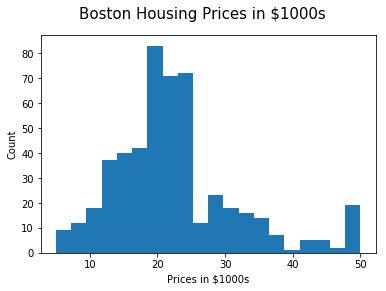

In [8]:
#Let's do a simple histogram on available house prices to see what we'll be working on
plt.hist(boston.target,bins=20)
plt.suptitle('Boston Housing Prices in $1000s', fontsize=15)
plt.xlabel('Prices in $1000s')
plt.ylabel('Count')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

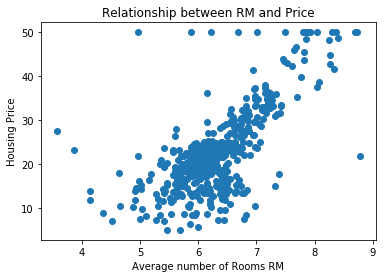

In [10]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average number of Rooms RM')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

In [11]:
lm.fit(X, bos.PRICE)
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

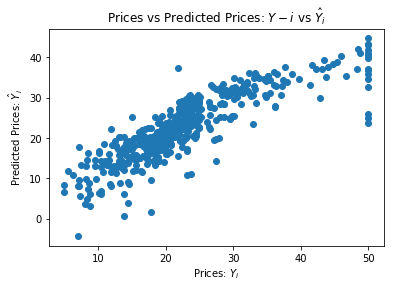

In [12]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y-i$ vs $\hat{Y}_i$')
plt.show()

In [13]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.89777921768749


In [14]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

62.65220001376927


In [16]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


In [18]:
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [20]:
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534663
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.541367275618256


Text(0,0.5,'Residuals')

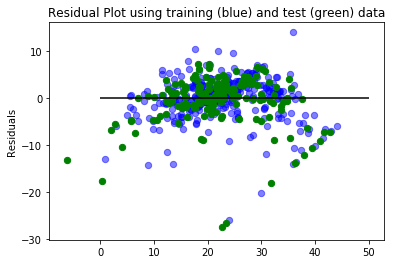

In [21]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c="b", s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c="g", s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

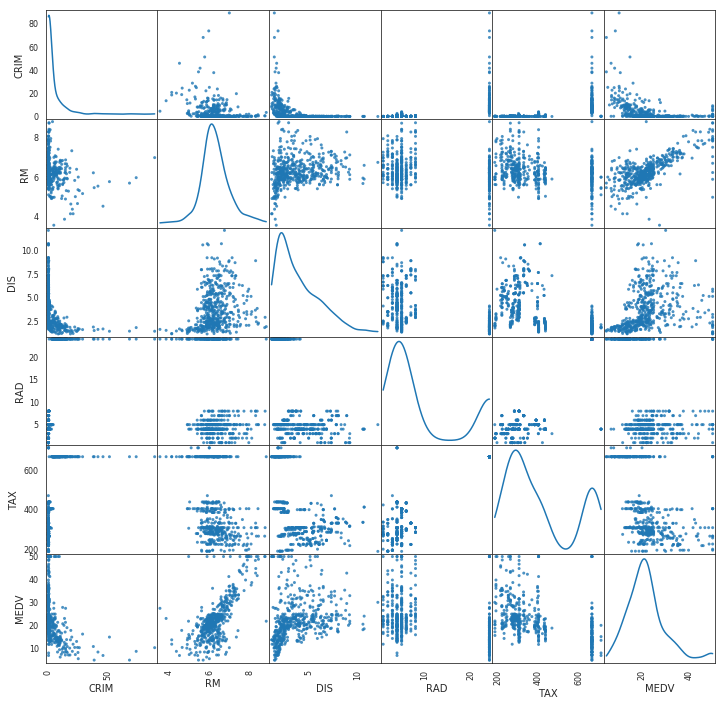

In [28]:
import seaborn
from pandas.plotting import scatter_matrix

with seaborn.axes_style('white'):
    smaller_frame = df[['CRIM', 'RM', 'DIS', 'RAD', 'TAX','MEDV']]
    scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde") 
plt.show()

In [32]:
df[['MEDV','RM','CRIM']].corr()

,MEDV,RM,CRIM
MEDV,1.000000,0.69536,-0.385832
RM,0.695360,1.00000,-0.219940
CRIM,-0.385832,-0.21994,1.000000


In [30]:
linr=LinearRegression().fit(X_train, Y_train) 
y_pred = linr.predict(X_test)
print ("R-squared for train: %.2f" %linr.score(X_train, Y_train))

R-squared for train: 0.76
